In [1]:
import BigKindsParser as bkp

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

import warnings
warnings.filterwarnings("ignore")

In [3]:
plt.rcParams["font.family"] = "Malgun Gothic"

In [4]:
df = pd.read_excel('C:\\Users\\cjsso\\project\\econo_columns_20170510-20220509.xlsx')

## 언론사 빈도 확인

In [5]:
df_key = bkp.press_counter(df)

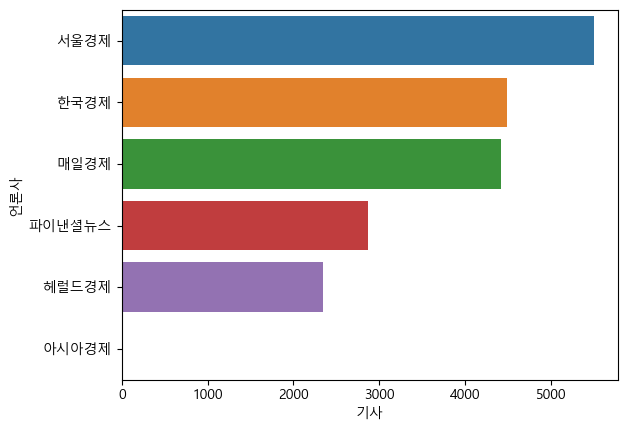

<Figure size 1000x1000 with 0 Axes>

In [6]:
sns.barplot(data = df_key, x = '기사', y = '언론사')

plt.figure(figsize = (10, 10), facecolor = 'white')
plt.show()

## 이상치 확인

In [7]:
outlier = df[df['언론사'] == '아시아경제'] ##아시아 경제 기사 추가 크롤링 필요

In [8]:
outlier.info

<bound method DataFrame.info of             뉴스 식별자        일자    언론사  기고자                                 제목  \
238   2.100801e+06  20220415  아시아경제  이지은        [기자수첩] 퇴임 기자회견 생략한 '소통 대통령'   
387   2.100801e+06  20220331  아시아경제  서소정                        [초동시각] 통화전쟁   
398   2.100801e+06  20220330  아시아경제  배경환                     [초동시각]인수위의 '삽'   
639   2.100801e+06  20220307  아시아경제  NaN      [시론]한국은행의 국채 매입과 통화정책의 (불)투명성   
898   2.100801e+06  20220209  아시아경제  유현석        [톺아보기]대한민국의 항공산업, 원팀만이 살길이다   
1400  2.100801e+06  20211217  아시아경제  차민영        [시시비비]디지털 시대, 정부 시장 괴리 해결돼야   
2334  2.100801e+06  20210910  아시아경제  이종길                 [최준영의 도시순례]신도시와 골목   
2711  2.100801e+06  20210804  아시아경제  강희종              [시시비비]딜레마에 빠진 기후변화 대응   
2789  2.100801e+06  20210727  아시아경제  김현정               [광장] 더 든든해진 근로장려금 제도   
2895  2.100801e+06  20210716  아시아경제  이종길                  [최준영의 도시순례]서울의 기억   
3094  2.100801e+06  20210625  아시아경제  이종길              [최준영의 도시순례]전기의 시대와 도시   
3231  2.100801e+06  

In [9]:
outlier['일자'] #아시아경제 기사는 2021년부터 빅카인즈에 기사를 업로드 --> 2017~2020년 기사는 별도 크롤링 필요

238     20220415
387     20220331
398     20220330
639     20220307
898     20220209
1400    20211217
2334    20210910
2711    20210804
2789    20210727
2895    20210716
3094    20210625
3231    20210611
3371    20210528
3501    20210514
3639    20210430
3663    20210428
3733    20210421
3820    20210413
4376    20210215
4544    20210127
Name: 일자, dtype: int64

## 키워드 빈도

In [10]:
df_keywords = df['키워드']

In [11]:
keywords = bkp.keywords_list(df_keywords)

In [12]:
news_key = bkp.keyword_parser(keywords)
news_key = bkp.duplication_remover(news_key)
key = bkp.word_counter(news_key)

In [13]:
news_key = bkp.counter_to_DataFrame(key)

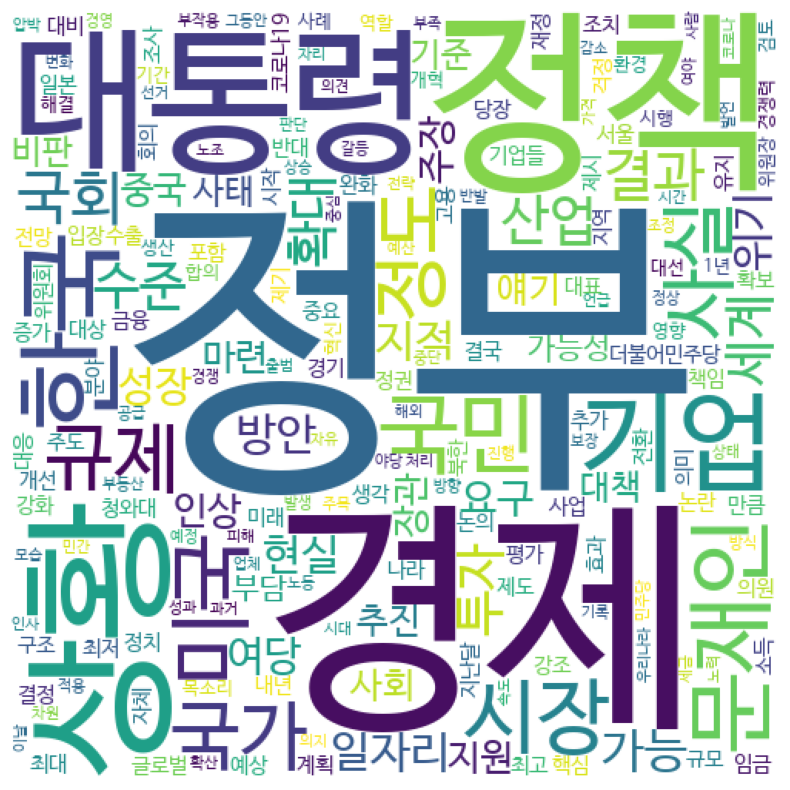

In [14]:
wc = WordCloud(font_path = 'C:\\Users\\cjsso\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumBarunGothic.ttf',
    width = 500,
    height = 500,
    background_color='white').generate_from_frequencies(news_key.set_index('단어').to_dict()["빈도"])


plt.figure(figsize = (10, 10))
plt.imshow(wc)
plt.axis('off')
plt.show()

### 언론사별 키워드 분석 --> 한경

In [ ]:
han = bkp.press_keywords_analysis(df, '한국경제')

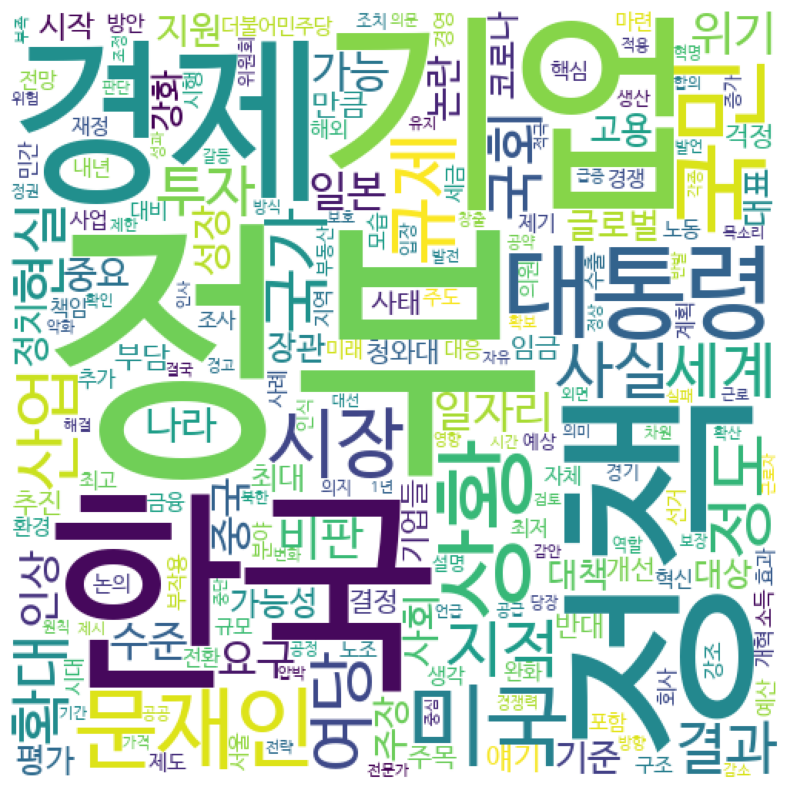

In [ ]:
wc = WordCloud(font_path = 'C:\\Users\\cjsso\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumBarunGothic.ttf',
    width = 500,
    height = 500,
    background_color='white').generate_from_frequencies(han.set_index('단어').to_dict()["빈도"])


plt.figure(figsize = (10, 10))
plt.imshow(wc)
plt.axis('off')
plt.show()

### 언론사별 키워드 분석 --> 매경

In [ ]:
daily = bkp.press_keywords_analysis(df, '매일경제')

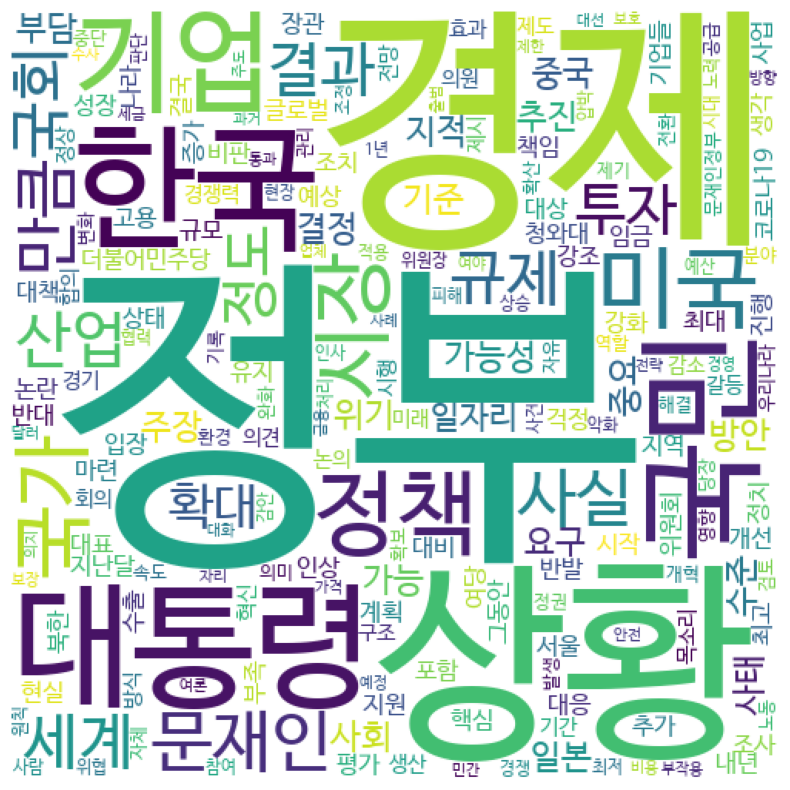

In [ ]:
wc = WordCloud(font_path = 'C:\\Users\\cjsso\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumBarunGothic.ttf',
    width = 500,
    height = 500,
    background_color='white').generate_from_frequencies(daily.set_index('단어').to_dict()["빈도"])


plt.figure(figsize = (10, 10))
plt.imshow(wc)
plt.axis('off')
plt.show()

### 언론사별 키워드 분석 --> 서경

In [ ]:
seoul = bkp.press_keywords_analysis(df, '서울경제')

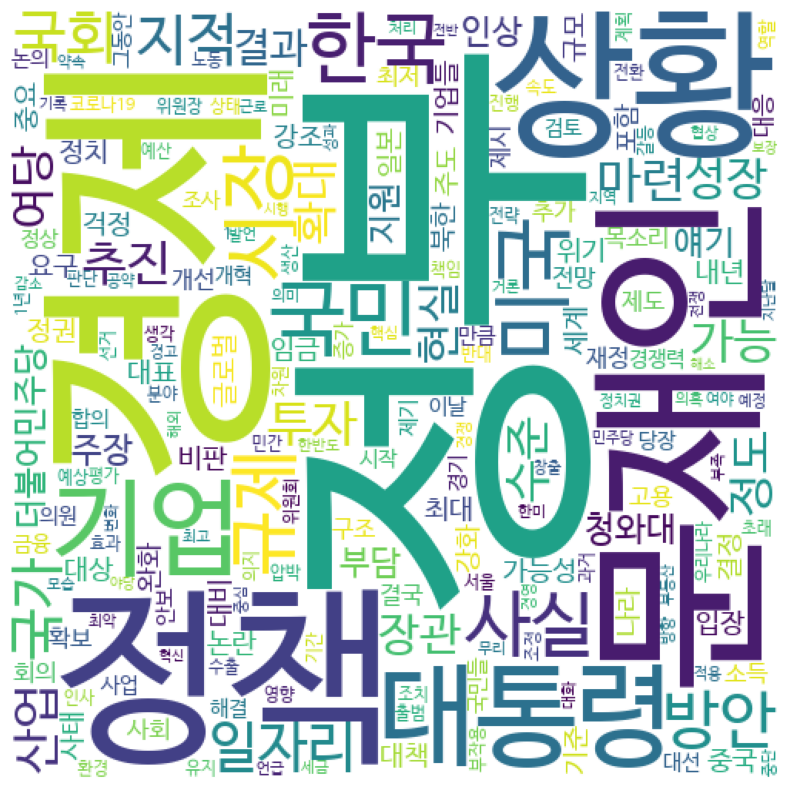

In [ ]:
wc = WordCloud(font_path = 'C:\\Users\\cjsso\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumBarunGothic.ttf',
    width = 500,
    height = 500,
    background_color='white').generate_from_frequencies(seoul.set_index('단어').to_dict()["빈도"])


plt.figure(figsize = (10, 10))
plt.imshow(wc)
plt.axis('off')
plt.show()

### 언론사별 키워드 분석 --> 파이낸셜

In [ ]:
financial = bkp.press_keywords_analysis(df, '파이낸셜뉴스')

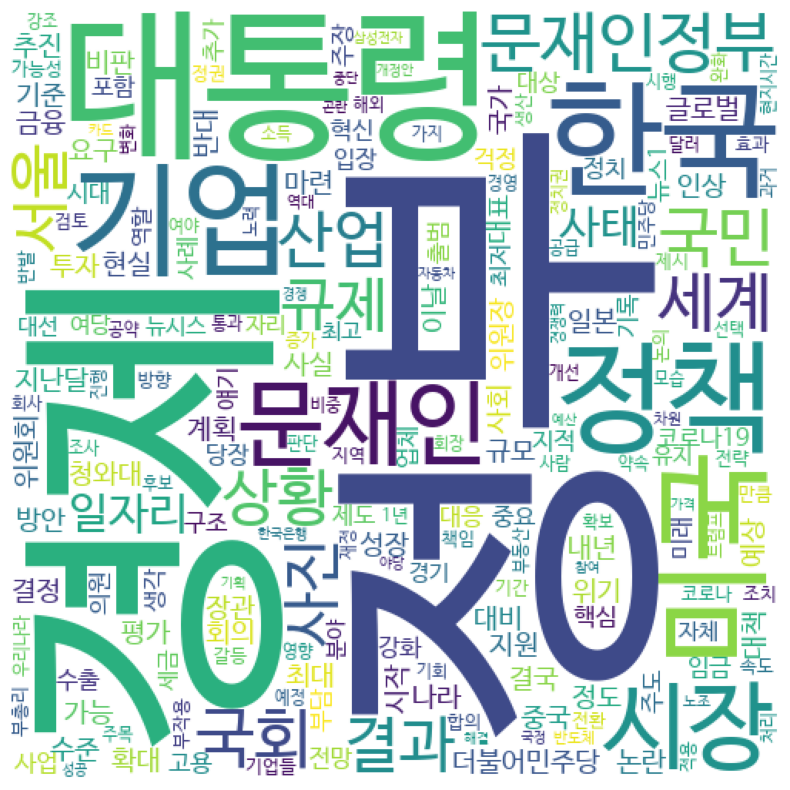

In [ ]:
wc = WordCloud(font_path = 'C:\\Users\\cjsso\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumBarunGothic.ttf',
    width = 500,
    height = 500,
    background_color='white').generate_from_frequencies(financial.set_index('단어').to_dict()["빈도"])


plt.figure(figsize = (10, 10))
plt.imshow(wc)
plt.axis('off')
plt.show()

### 언론사별 키워드 분석 --> 헤럴드

In [ ]:
herold = bkp.press_keywords_analysis(df, '헤럴드경제')

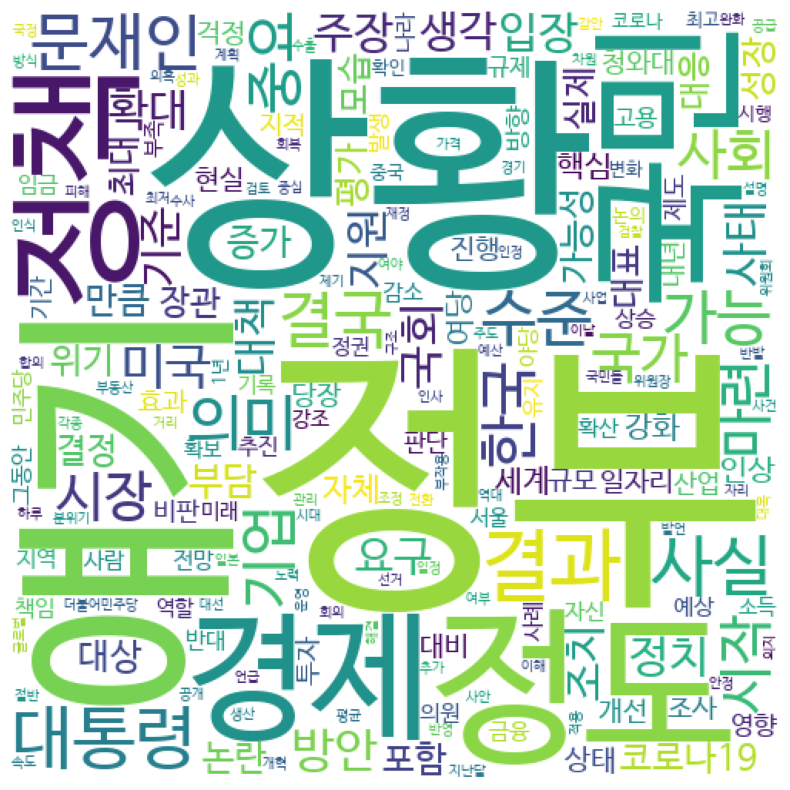

In [ ]:
wc = WordCloud(font_path = 'C:\\Users\\cjsso\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumBarunGothic.ttf',
    width = 500,
    height = 500,
    background_color='white').generate_from_frequencies(herold.set_index('단어').to_dict()["빈도"])


plt.figure(figsize = (10, 10))
plt.imshow(wc)
plt.axis('off')
plt.show()

## TF-IDF 분석

언론사별 용어 빈도는 비슷 --> tf-idf를 통한 특징 추출 필요

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer #module import

### 한경 

In [ ]:
han_words = df[df['언론사'] == '한국경제']

In [ ]:
han_words = han_words['키워드']

In [ ]:
tfidf = TfidfVectorizer()
tdm = tfidf.fit_transform(han_words)

In [ ]:
word_count1 = pd.DataFrame({
    '단어': tfidf.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat
}).sort_values('빈도', ascending = False).reset_index(drop = True)

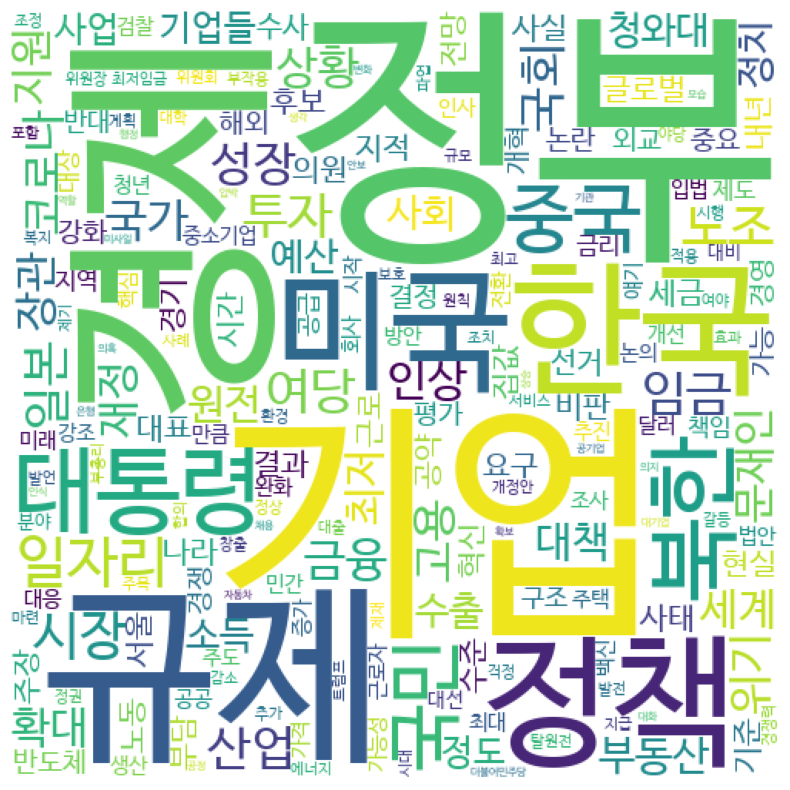

In [ ]:
wc = WordCloud(font_path = 'C:\\Users\\cjsso\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumBarunGothic.ttf',
    width = 500,
    height = 500,
    background_color='white').generate_from_frequencies(word_count1.set_index('단어').to_dict()["빈도"])


plt.figure(figsize = (10, 10))
plt.imshow(wc)
plt.axis('off')
plt.show()

### 매경

In [ ]:
mail_words = df[df['언론사'] == '매일경제']

In [ ]:
mail_words = mail_words['키워드']

In [ ]:
tfidf = TfidfVectorizer()
tdm = tfidf.fit_transform(mail_words)

In [ ]:
word_count2 = pd.DataFrame({
    '단어': tfidf.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat
}).sort_values('빈도', ascending = False).reset_index(drop = True)

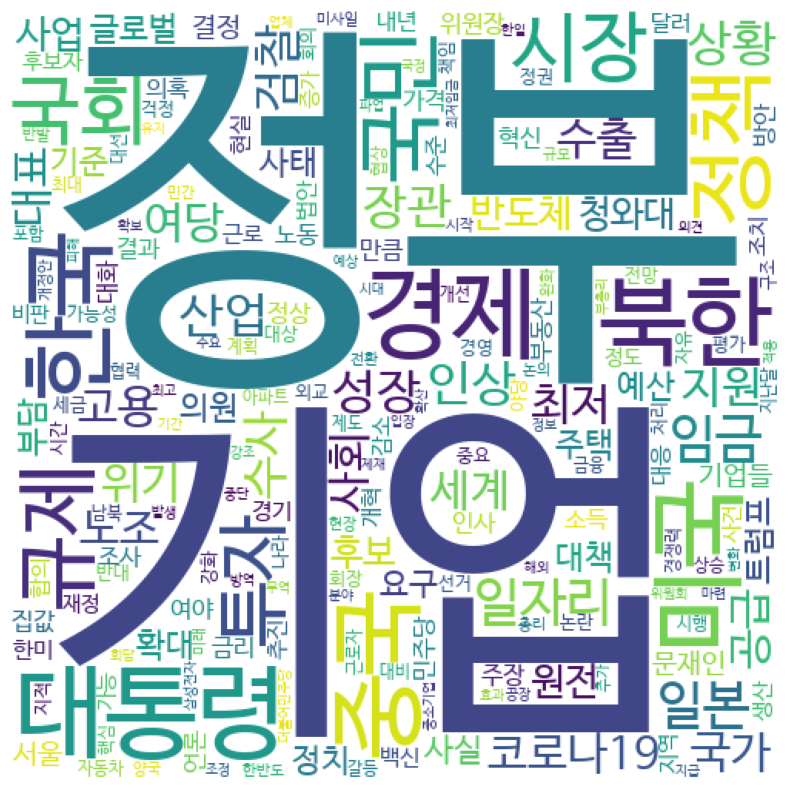

In [ ]:
wc = WordCloud(font_path = 'C:\\Users\\cjsso\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumBarunGothic.ttf',
    width = 500,
    height = 500,
    background_color='white').generate_from_frequencies(word_count2.set_index('단어').to_dict()["빈도"])


plt.figure(figsize = (10, 10))
plt.imshow(wc)
plt.axis('off')
plt.show()

### 서경

In [ ]:
seo_words = df[df['언론사'] == '서울경제']

In [ ]:
seo_words = seo_words['키워드']

In [ ]:
tfidf = TfidfVectorizer()
tdm = tfidf.fit_transform(seo_words)

In [ ]:
word_count3 = pd.DataFrame({
    '단어': tfidf.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat
}).sort_values('빈도', ascending = False).reset_index(drop = True)

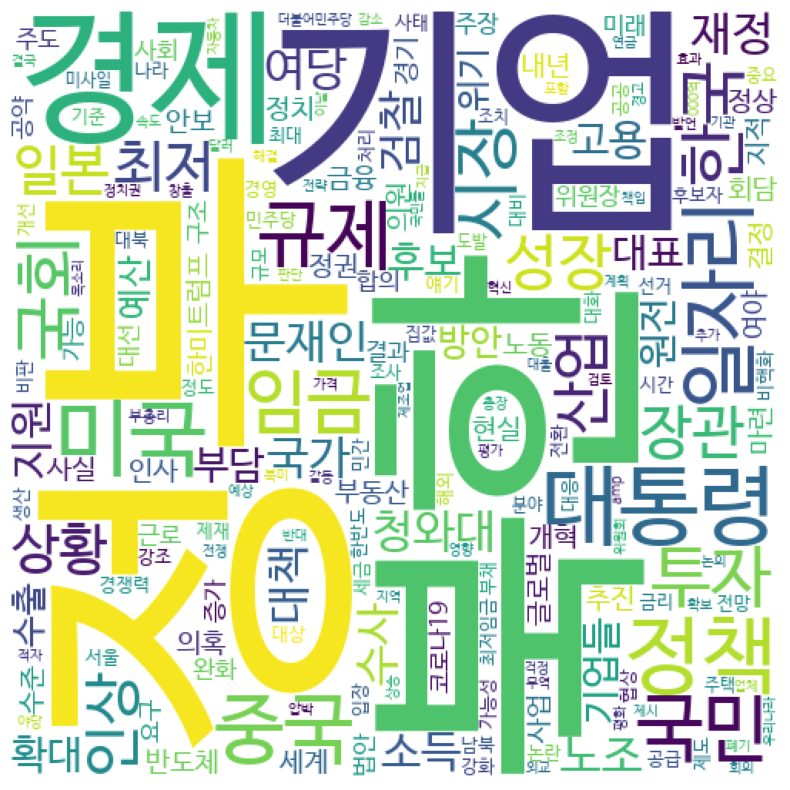

In [ ]:
wc = WordCloud(font_path = 'C:\\Users\\cjsso\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumBarunGothic.ttf',
    width = 500,
    height = 500,
    background_color='white').generate_from_frequencies(word_count3.set_index('단어').to_dict()["빈도"])


plt.figure(figsize = (10, 10))
plt.imshow(wc)
plt.axis('off')
plt.show()

### 파이낸셜

In [ ]:
fin_words = df[df['언론사'] == '파이낸셜뉴스']

In [ ]:
fin_words = fin_words['키워드']

In [ ]:
tfidf = TfidfVectorizer()
tdm = tfidf.fit_transform(fin_words)

In [ ]:
word_count4 = pd.DataFrame({
    '단어': tfidf.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat
}).sort_values('빈도', ascending = False).reset_index(drop = True)

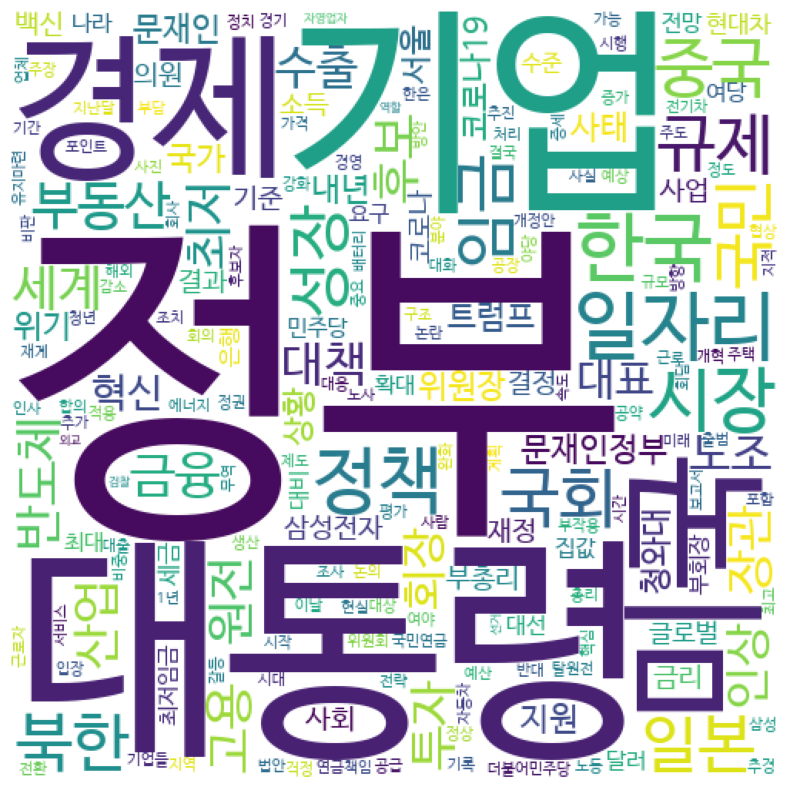

In [ ]:
wc = WordCloud(font_path = 'C:\\Users\\cjsso\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumBarunGothic.ttf',
    width = 500,
    height = 500,
    background_color='white').generate_from_frequencies(word_count4.set_index('단어').to_dict()["빈도"])


plt.figure(figsize = (10, 10))
plt.imshow(wc)
plt.axis('off')
plt.show()

### 헤럴드

In [ ]:
hero_words = df[df['언론사'] == '헤럴드경제']

In [ ]:
hero_words = hero_words['키워드']

In [ ]:
tfidf = TfidfVectorizer()
tdm = tfidf.fit_transform(hero_words)

In [ ]:
word_count5 = pd.DataFrame({
    '단어': tfidf.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat
}).sort_values('빈도', ascending = False).reset_index(drop = True)

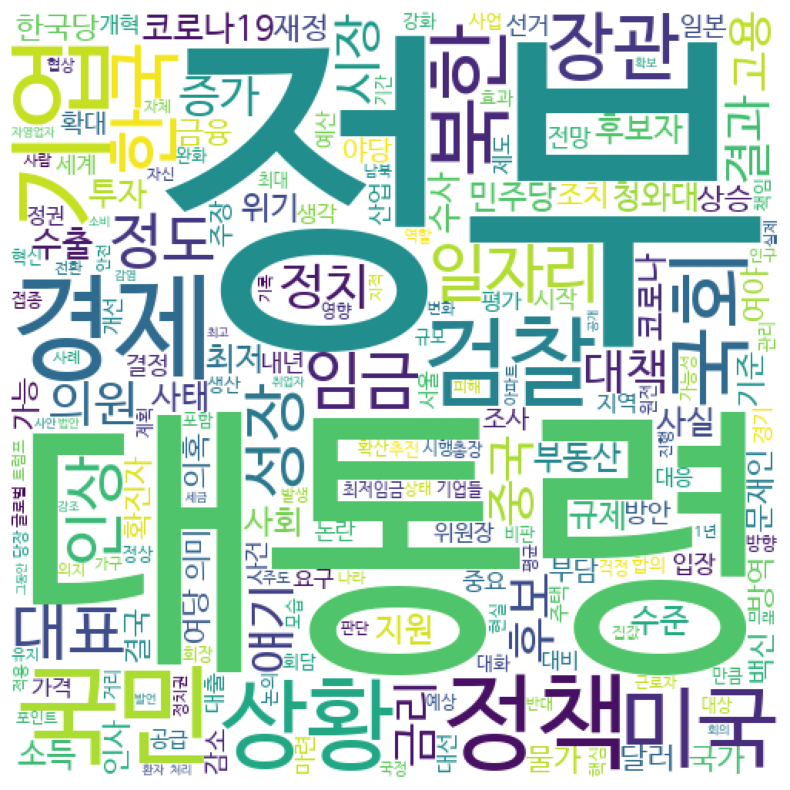

In [ ]:
wc = WordCloud(font_path = 'C:\\Users\\cjsso\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumBarunGothic.ttf',
    width = 500,
    height = 500,
    background_color='white').generate_from_frequencies(word_count5.set_index('단어').to_dict()["빈도"])


plt.figure(figsize = (10, 10))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [ ]:
words_df1 = pd.concat([word_count1, word_count2], join='outer', axis=1)

In [ ]:
words_df1.columns = ['단어(한경)', '빈도(한경)', '단어(매경)', '빈도(매경)']

In [ ]:
words_df2 = pd.concat([word_count3, word_count4, word_count5], join='outer', axis=1)

In [ ]:
words_df2.columns = ['단어(서경)', '빈도(서경)','단어(파이낸셜)', '빈도(파이낸셜)','단어(헤럴드)', '빈도(헤럴드)']

In [ ]:
words_df = pd.concat([words_df1, words_df2], join = 'outer', axis = 1)

In [ ]:
words_df.head(20)

단어(한경)      빈도(한경) 단어(매경)      빈도(매경) 단어(서경)      빈도(서경) 단어(파이낸셜)  \
0      정부  170.874039     정부  127.335164     정부  207.973736       정부   
1      기업  143.353837     기업  110.468213     북한  153.504708      대통령   
2      경제  109.593958    대통령  105.349634     기업  147.576313       기업   
3      규제   99.747167     경제   98.987800     경제  141.483724       경제   
4      한국   96.602629     북한   94.959321    대통령  136.803875       미국   
5      정책   95.039328     미국   93.682823     정책  125.951686      일자리   
6      미국   90.302124     중국   87.481722     미국  125.941853       한국   
7     대통령   89.964928     한국   86.394644    일자리  108.601917       정책   
8      북한   86.210303     정책   76.064262     중국  104.657793       시장   
9      중국   83.305281     국민   73.182543     규제  100.005150       규제   
10     국민   79.407091     규제   68.673798     국민   97.847511       국회   
11    일자리   79.164376     국회   64.407326     임금   88.199132       중국   
12     시장   68.216227     시장   63.713174     한국   84.390802       일본   
13     노조   67.212984     투자   61.656313     국회   83.832130       성장   
14     여당   64.899902    일자리   60.358299     투자   81.507045       임금   
15     투자   64.160446     임금   59.657628     시장   80.210144       북한   
16     임금   62.896762     일본   58.333997     성장   79.884542       국민   
17     산업   60.127337     성장   52.338215     장관   74.306424      부동산   
18     일본   58.510270     산업   52.099878     산업   73.267545       후보   
19     국회   58.063480     장관   51.585880     인상   73.013147      반도체   

     빈도(파이낸셜) 단어(헤럴드)    빈도(헤럴드)  
0   96.774121      정부  68.249231  
1   78.668422     대통령  55.984063  
2   73.745679      경제  47.226472  
3   66.228374      국민  43.421289  
4   60.756488      기업  43.096729  
5   58.554333      정책  41.426563  
6   57.845017      검찰  36.136012  
7   53.730281      상황  35.747487  
8   51.787001      미국  34.320186  
9   45.949896      국회  33.419709  
10  43.571681      북한  32.206295  
11  42.673492      장관  32.127931  
12  40.091627      한국  31.377541  
13  39.962075     일자리  30.921592  
14  39.627805      성장  30.897654  
15  39.523417      임금  30.480363  
16  38.434493      대표  29.536249  
17  35.483854      인상  28.477505  
18  34.080738      정도  28.369887  
19  33.821207      정치  27.913461

## Topic Modelling

In [ ]:
news_words = bkp.keyword_parser(df_keywords)

In [ ]:
from gensim import corpora
news_dict = corpora.Dictionary(news_words)
corpus = [news_dict.doc2bow(text) for text in news_words]

NameError: name 'news_words' is not defined

In [ ]:
import gensim

perplexity = []
for i in range(2,20):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = i, id2word=news_dict)
    perplexity.append(ldamodel.log_perplexity(corpus))

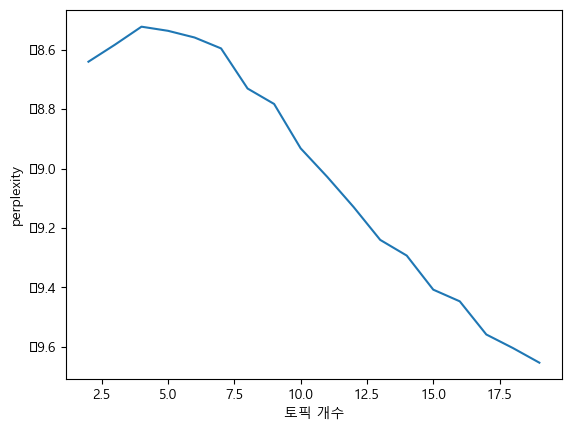

In [ ]:
x = range(2,20)
plt.plot(x,perplexity)
plt.xlabel("토픽 개수")
plt.ylabel("perplexity")
plt.show()

In [ ]:
from gensim.models import CoherenceModel

coherence = []
for i in range(2,20):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = i, id2word=news_dict)
    coherence_mo_lda = CoherenceModel(model = ldamodel, texts = news_words, dictionary = news_dict, topn=10) 
    coherence_lda = coherence_mo_lda.get_coherence()
    coherence.append(coherence_lda)

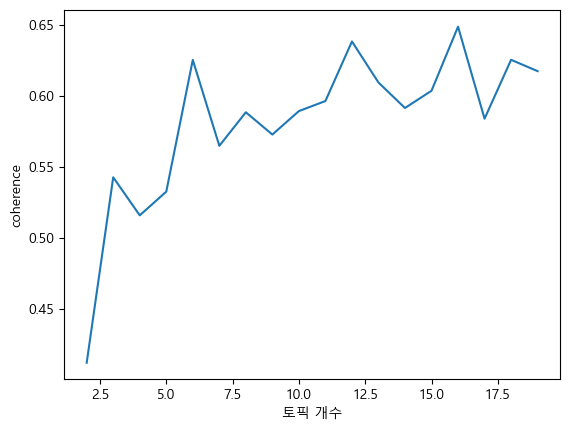

In [ ]:
x = range(2,20)
plt.plot(x,coherence)
plt.xlabel("토픽 개수")
plt.ylabel("coherence")
plt.show()

In [ ]:
NUM_TOPICS = 15
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=news_dict, passes=10)
topics = ldamodel.print_topics(num_words=5)
for topic in topics:
    print(topic)

(0, '0.123*"원전" + 0.052*"탈원전" + 0.024*"정책" + 0.020*"건설" + 0.019*"에너지"')
(1, '0.026*"대통령" + 0.020*"국민" + 0.019*"국회" + 0.016*"대표" + 0.014*"여당"')
(2, '0.022*"정부" + 0.014*"사업" + 0.012*"교육" + 0.011*"지역" + 0.011*"대학"')
(3, '0.048*"북한" + 0.027*"미국" + 0.026*"대통령" + 0.014*"트럼프" + 0.012*"정상"')
(4, '0.016*"장관" + 0.014*"검찰" + 0.014*"인사" + 0.012*"수사" + 0.011*"청와대"')
(5, '0.038*"정부" + 0.033*"기업" + 0.024*"경제" + 0.023*"규제" + 0.020*"정책"')
(6, '0.030*"경제" + 0.016*"성장" + 0.012*"금리" + 0.012*"경기" + 0.011*"위기"')
(7, '0.026*"정부" + 0.018*"예산" + 0.018*"재정" + 0.013*"국민" + 0.012*"세금"')
(8, '0.032*"중국" + 0.031*"미국" + 0.029*"한국" + 0.016*"세계" + 0.014*"산업"')
(9, '0.032*"일본" + 0.029*"중국" + 0.022*"한국" + 0.021*"사드" + 0.015*"정부"')
(10, '0.023*"정부" + 0.015*"부동산" + 0.014*"대책" + 0.013*"시장" + 0.012*"서울"')
(11, '0.022*"노조" + 0.017*"국회" + 0.009*"정부" + 0.009*"법안" + 0.008*"개정안"')
(12, '0.027*"기업" + 0.020*"회장" + 0.017*"투자" + 0.017*"경영" + 0.012*"부회장"')
(13, '0.016*"금융" + 0.012*"시장" + 0.012*"은행" + 0.010*"규제" + 0.009*"서비스"')
(14, '

In [ ]:
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, news_dict)
pyLDAvis.display(vis)

c:\Users\cjsso\AppData\Local\R-MINI~1\envs\r-reticulate\lib\site-packages\past\builtins\misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


In [ ]:
def make_topictable(ldamodel, corpus):
    topic_table = pd.DataFrame()

    for i, topic_list in enumerate(ldamodel[corpus]):
        doc = topic_list[0] if ldamodel.per_word_topics else topic_list            
        doc = sorted(doc, key=lambda x: (x[1]), reverse=True)

        for j, (topic_num, prop_topic) in enumerate(doc):
            if j == 0: 
                topic_table = topic_table.append(pd.Series([int(topic_num), round(prop_topic,4), topic_list]), ignore_index=True)
            else:
                break
    return(topic_table)

In [ ]:
topictable = make_topictable(ldamodel, corpus)
topictable = topictable.reset_index() 

In [ ]:
topictable.columns = ['뉴스 번호', '주요 토픽', '주요 토픽 비중', '토픽 별 비중']
topictable.head(20)

뉴스 번호  주요 토픽  주요 토픽 비중                                            토픽 별 비중
0       0      1    0.5422  [(1, 0.54220396), (4, 0.17330664), (5, 0.03442...
1       1      4    0.5693  [(1, 0.079307675), (2, 0.17539753), (3, 0.0134...
2       2      5    0.2115  [(1, 0.20883845), (2, 0.089167625), (3, 0.0954...
3       3      5    0.7628  [(1, 0.020635415), (4, 0.015301094), (5, 0.762...
4       4      1    0.4118  [(1, 0.4117735), (4, 0.33301938), (5, 0.027004...
5       5      4    0.4579  [(1, 0.43756384), (4, 0.45794952), (5, 0.06189...
6       6     10    0.6422  [(1, 0.011046051), (2, 0.2303941), (5, 0.11155...
7       7      1    0.4632  [(0, 0.014638992), (1, 0.463216), (2, 0.423539...
8       8      5    0.6286  [(1, 0.09804574), (4, 0.036553133), (5, 0.6286...
9       9      6    0.5026  [(1, 0.030559622), (6, 0.50258666), (7, 0.4278...
10     10      3    0.7159  [(1, 0.18018621), (3, 0.71593946), (5, 0.03670...
11     11      4    0.5043  [(1, 0.40025634), (4, 0.50426704), (5, 0.02710...
12     12      6    0.8660  [(3, 0.0799704), (4, 0.014472929), (6, 0.86604...
13     13      6    0.6859  [(1, 0.0799931), (2, 0.0153969955), (3, 0.0107...
14     14      9    0.3146  [(0, 0.010962815), (1, 0.091257654), (4, 0.139...
15     15      3    0.7872  [(1, 0.053004067), (2, 0.034139577), (3, 0.787...
16     16      6    0.9081  [(5, 0.044485353), (6, 0.9081134), (7, 0.02863...
17     17     11    0.5715  [(0, 0.049867954), (6, 0.09516829), (10, 0.247...
18     18     10    0.4227  [(0, 0.012749258), (1, 0.159789), (3, 0.055511...
19     19      7    0.7187  [(1, 0.106882386), (5, 0.031410918), (6, 0.077...

In [ ]:
news_topic_df = pd.concat([df['제목'],topictable['주요 토픽']], axis = 1)

In [ ]:
news_topic_df[news_topic_df['주요 토픽'] == 5].head(30) 

제목  주요 토픽
2                    [사설] 임기 마지막까지 촛불 타령으로 자화자찬한 문재인      5
3                 [사설] 기업 이구동성 “새 정부 최우선 경제정책은 규제개혁”      5
8               [사설] 기업이 다시 뛸 수 있게 해야 성장 복지 선순환 가능하다      5
49                [사설] ‘민간 중심 역동적 경제’ 尹의 뚝심과 실천에 달렸다      5
51                   [사설] 민간 자유보장에 새 정부 국정과제의 성패 달렸다      5
57                     [사설] 좋은 말 넘치는 인수위 국정과제에서 빠진 것      5
63           [사설] 서비스산업 경쟁력 OECD 28위 국회가 11년째 발목잡은 탓      5
64               [사설] 실적 개선에도 투자 꺼리는 기업 모래주머니 제거가 해법      5
73                    [사설] 기대와 아쉬움 공존한 인수위의 인구정책 청사진      5
100                [사설] “한국은 투자 유치보다 쫓아내기에 급급하다”는 일침      5
132              [사설] '과학 르네상스' 이끌 尹정부 과학 컨트롤타워 필요하다      5
144                 [사설]마크롱 재선은 개혁의 결과임을 윤 정부도 잊지말아야      5
145             [사설] “경제의 정치화 경계하라”는 靑, 정책 실패부터 사죄하라      5
168  [사설] 첫 삽 뜬 지 30년 지난 새만금, 풀 수 있는 규제 다 풀어 제대로 해보라      5
170           [사설] “풀 수 있는 규제 다 풀겠다” 규제 개혁은 말보다 행동이다      5
176             [사설] 이창용의 "민간 주도 성장", 정말 오랜만에 듣는 바른말      5
208              [사설] 메가 M&A 트렌드 속 韓 외톨이, 기업 野性 일깨워라      5
223                [fn사설] 베트남으로 간 KT, 왜 국내선 원격의료 못하나      5
267             [사설] ‘민간 주도 성장’ 위해 기업의 세금 모래주머니 벗겨내야      5
271                  [fn사설] 규제 싹 풀려면 '기준국가제' 진지한 검토를      5
278         [사설] 삼성의 TSMC 2.5배 법인세율, 이런게 '기업 모래주머니'다      5
292               [사설] 새 경제팀 과제는 포퓰리즘 절연과 성장 동력 재점화다      5
295              [사설] '성장'과 '생산성' 한은 총재 후보자가 짚은 핵심과제      5
300                 추경호 경제팀, 재정안정과 구조개혁에 성패 달렸다 [사설]      5
334           [사설] 용산을 '한국 랜드마크'로 만들자는 10년 청사진 실행해보라      5
346                 [사설] ‘고용 없는 성장’은 규제 만능주의가 빚은 결과다      5
358                       경제통 한덕수 총리 지명자에 거는 기대 [사설]      5
360             [사설] 새 총리 내정, 노동 규제 대개혁으로 성장엔진 재점화하라      5
365               [사설] 한덕수 후보자의 진단과 처방에 공감한다 관건은 실행력      5
380                 [사설] 尹정부 성공하려면 임기 초에 구조 개혁 승부 봐야      5

In [ ]:
news_topic_df[news_topic_df['주요 토픽'] == 2].head(30) 

제목  주요 토픽
1                  네온 씽큐존 미래 모빌리티 CES서 기업들 ‘AI 전쟁’    2.0
2                  총선 겨눈 가짜뉴스 기울어진 저널리즘 언론개혁 속도 낼까    2.0
3                      오늘의 날씨 - 오후 (2019년 12월 31일)    2.0
4                김대종 세종대 교수 “RCEP 가입으로 신통상전략 대비하자”    2.0
5         일주일 앞 다가온 ‘신기술의 향연’ CES 2020 주인공은 AI 8K?    2.0
7                                 웅진코웨이 자기주식 처분 결정    2.0
8                      오늘의 날씨 - 오전 (2019년 12월 31일)    2.0
9                양심적 병역거부 대체복무 부동산 계약 후 30일 내 신고해야    2.0
11                      LG전자, 인공지능 모터 트윈워시로 美시장 공략    2.0
12             [비전 2020] 인공지능 로봇 자동차부품 ‘미래 신사업’ 발굴    2.0
13              [비전 2020] 국내 최대 융복합 연구단지 조성해 혁신 주도    2.0
16                LG전자 ‘인공지능 DD모터’ 드럼세탁기로 미국 시장 공략    2.0
19                      ‘인공지능 DD모터’ LG 세탁기, CES 출격    2.0
22                            루미마이크로 불성실 공시법인 지정예고    2.0
28                            디에이테크놀로지, 특별관계자 지분변동    2.0
30  ㈜디티앤씨, IT-BT-AI 융합 기술 선도 “시험인증업계 새 패러다임 제시할 것”    2.0
31                              동양네트웍스, 특별관계자 지분변동    2.0
32                                  필링크 자기주식 처분 결정    2.0
35                                오스코텍, 특별관계자 지분변동    2.0
39                               웰크론강원, 특별관계자 지분변동    2.0
42                                유한양행, 특별관계자 지분변동    2.0
43                                  액트, 특별관계자 지분변동    2.0
53                                디에이피, 특별관계자 지분변동    2.0
54                                네오티스, 특별관계자 지분변동    2.0
55                                  카스, 특별관계자 지분변동    2.0
56                세종대학교 경영전문대학원, 2020학년도 전기 신입생 모집    2.0
57                                썸에이지, 특별관계자 지분변동    2.0
61                              네추럴FNP, 특별관계자 지분변동    2.0
62                             엠앤씨생명과학, 특별관계자 지분변동    2.0
66              한국가스공사 영남에너지서비스㈜포항과 4조 9996억원 계약체결    2.0

In [ ]:
news_topic_df[news_topic_df['주요 토픽'] == 1].head(20) 

제목  주요 토픽
0                  가천대 2020학년도 정시 모집 평균 6.9 대 1    1.0
6                  ‘무어의 법칙’보다 7배 빠르다, 질주하는 인공지능    1.0
21                            에이치엔티, 특별관계자 지분변동    1.0
23                   한화시스템 국방과학연구소와 2222억원 계약체결    1.0
26                              나무가, 특별관계자 지분변동    1.0
27                   LIG넥스원 국방과학연구소와 906억원 계약체결    1.0
29                 현대미포조선 유럽 지역 선주와 1763억원 계약체결    1.0
37                             두올산업, 특별관계자 지분변동    1.0
38                            웰크론강원, 특별관계자 지분변동    1.0
45                            피에스엠씨, 특별관계자 지분변동    1.0
49                            KR모터스, 특별관계자 지분변동    1.0
51                           동양네트웍스, 특별관계자 지분변동    1.0
59                           한국경제TV, 특별관계자 지분변동    1.0
73              한국가스공사 서라벌도시가스㈜과 2조 1498억원 계약체결    1.0
75                            신스타임즈, 특별관계자 지분변동    1.0
87                           코리아에스이, 특별관계자 지분변동    1.0
89  [13:00] 외국인 매수 늘면서 코스닥 시장 상승세(668p, +6.48p)    1.0
91                              기상청, 국무총리 표창 수상    1.0
92  [12:00] 외국인 매수 늘면서 코스닥 시장 상승세(666p, +5.11p)    1.0
93            [12:00] 코스피 시장 보합세(2202p, -2.50p)    1.0

In [ ]:
news_topic_df[news_topic_df['주요 토픽'] == 0].head(20)

제목  주요 토픽
18                        인공지능 연산 처리장치 국산화로 혁신 실현    0.0
25                               리노공업, 특별관계자 지분변동    0.0
58                            엠앤씨생명과학, 특별관계자 지분변동    0.0
60                               호전실업, 특별관계자 지분변동    0.0
63   [마감 시황] 외국인 매도 늘면서 코스피 시장 하락세(2198p, -6.54p)    0.0
65                               와이엠티, 특별관계자 지분변동    0.0
70             LG전자, 업그레이드 한 ‘트윈워시’ 신제품 CES에 내놓는다    0.0
72                            [코스닥]제일제강 경영권 분쟁 소송    0.0
81              [14:00] 코스피 시장 보합세(2200p, -3.93p)    0.0
121                                   바른손 거래정지 해제    0.0
128                             에이치엔티, 특별관계자 지분변동    0.0
161                               이트론, 특별관계자 지분변동    0.0
162                              가온전선, 특별관계자 지분변동    0.0
165                        미래에셋대우스팩1호, 특별관계자 지분변동    0.0
188                        동부건설 (주)세성과 613억원 계약체결    0.0
198                            진원생명과학, 특별관계자 지분변동    0.0
219                     한라 (주)서플러스글로벌과 561억원 계약체결    0.0
221                   오늘의 날씨 - 오전 (2019년 12월 27일)    0.0
228                                   에이아이비트 거래정지    0.0
249                               파라텍, 특별관계자 지분변동    0.0